In [1]:
pip install --user scikit-learn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# No noise

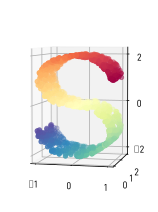

In [14]:
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, noise = 0., random_state=0)

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -77)

In [15]:
# Hard thresholding K

K = torch.zeros([1000,1000])
for r1 in range(len(X)):
    for r2 in range(len(X)):
        K[r1][r2] = float(np.linalg.norm(X[r1] - X[r2]) < 1.)

In [16]:
# Soft thresholding K

K_soft = torch.zeros([1000,1000])
for r1 in range(len(X)):
    for r2 in range(len(X)):
        K_soft[r1][r2] = np.exp(-np.linalg.norm(X[r1] - X[r2])**2/2)

100%|██████████| 5000/5000 [02:16<00:00, 36.72it/s]


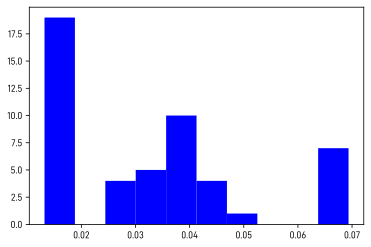

tensor(0.0132)
[tensor(0.0132)]


In [17]:
errors = []
bs=50
for k in range(1,2):
    u0=1/1000*torch.randn([bs, K.shape[0], k], device="cuda") 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=bs, max_steps=5000)
    fac.fith(
        K_soft,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    print(torch.min(error))
    errors.append(torch.min(error))

print(errors)

In [18]:
component_vector_soft_0 = fac.report.x_best[0][torch.argmin(fac.report.loss_best)].cpu().detach().numpy()

In [19]:
learned_order_soft_0 = [y[0] for y in sorted(enumerate(component_vector_soft_0), key=lambda x: x[1])]

In [20]:
t_0 = color

/home/symfac/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


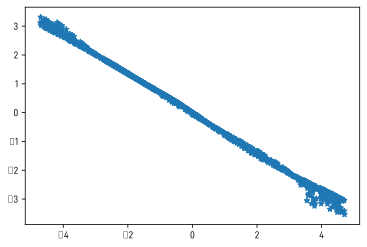

In [21]:
plt.plot(t_0, component_vector_soft_0, '*')

In [22]:
# we pickle 1) 3-d data 2) time component, 3) u vector 
open('manifold_n_0.pickle', 'wb').write(pickle.dumps([t_0, component_vector_soft_0, X]))

36265

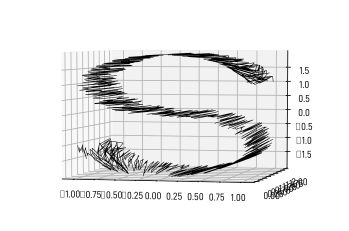

In [23]:
Y= X[learned_order_soft_0]

ax = plt.axes(projection='3d')
xline = Y[:,0]
yline = Y[:,1]
zline = Y[:,2]
ax.plot3D(xline, yline, zline, c="black")
ax.view_init(4, -77)

# Noise 0.2

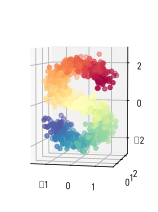

In [24]:
X2, color2 = datasets.make_s_curve(n_points, noise = 0.2, random_state=0)
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -77)

In [25]:
K_n02 = torch.zeros([1000,1000])
for r1 in range(len(X2)):
    for r2 in range(len(X2)):
        K_n02[r1][r2] = np.exp(-np.linalg.norm(X2[r1] - X2[r2])**2/2)

100%|██████████| 5000/5000 [02:47<00:00, 29.91it/s]


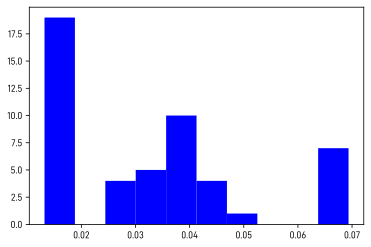

tensor(0.0160)
[tensor(0.0160)]


In [26]:
errors = []
bs=50
for k in range(1,2):
    u0=1/1000*torch.randn([bs, len(K_n02), k], device="cuda") 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac2 = RBFExpansionV2(k=k, batch_size=bs, max_steps=5000)
    fac2.fith(
        K_n02,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    error = fac2.report.loss_best
    print(torch.min(error))
    errors.append(torch.min(error))
print(errors)

In [27]:
component_vector_soft_02 = fac2.report.x_best[0][torch.argmin(fac2.report.loss_best)].cpu().detach().numpy()
t_02 = color2

/home/symfac/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


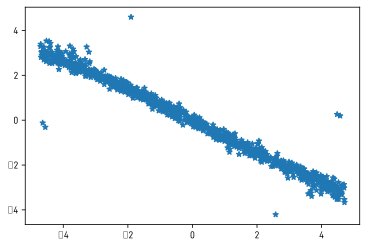

In [28]:
plt.plot(t_02, component_vector_soft_02, '*')

In [29]:
# we pickle 1) 3-d data 2) time component, 3) u vector 
open('manifold_n_02.pickle', 'wb').write(pickle.dumps([t_02, component_vector_soft_02, X2]))

36265

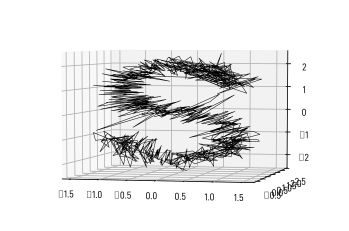

In [30]:
learned_order_soft_02 = [y[0] for y in sorted(enumerate(component_vector_soft_02), key=lambda x: x[1])]
Y= X2[learned_order_soft_02]

ax = plt.axes(projection='3d')
xline = Y[:,0]
yline = Y[:,1]
zline = Y[:,2]
ax.plot3D(xline, yline, zline, c="black")
ax.view_init(4, -77)

# Noise 0.4

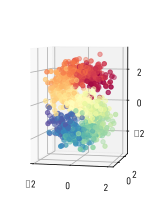

In [31]:
X3, color3 = datasets.make_s_curve(n_points, noise = 0.4, random_state=0)
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -77)

In [32]:
K_n03 = torch.zeros([1000,1000])
for r1 in range(len(X3)):
    for r2 in range(len(X3)):
        K_n03[r1][r2] = np.exp(-np.linalg.norm(X3[r1] - X3[r2])**2/2)

100%|██████████| 5000/5000 [02:49<00:00, 29.48it/s]


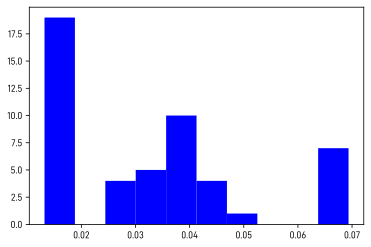

tensor(0.0208)
[tensor(0.0208)]


In [33]:
errors = []
bs=50
for k in range(1,2):
    u0=1/1000*torch.randn([bs, len(K_n03), k], device="cuda") 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac3 = RBFExpansionV2(k=k, batch_size=bs, max_steps=5000)
    fac3.fith(
        K_n03,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    error = fac3.report.loss_best
    print(torch.min(error))
    errors.append(torch.min(error))
print(errors)

In [34]:
component_vector_soft_03 = fac3.report.x_best[0][torch.argmin(fac3.report.loss_best)].cpu().detach().numpy()
t_03 = color3

/home/symfac/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


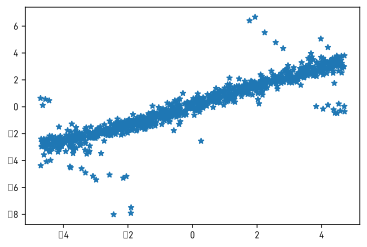

In [35]:
plt.plot(t_03, component_vector_soft_03, '*')

In [36]:
# we pickle 1) 3-d data 2) time component, 3) u vector 
open('manifold_n_03.pickle', 'wb').write(pickle.dumps([t_03, component_vector_soft_03, X3]))

36265

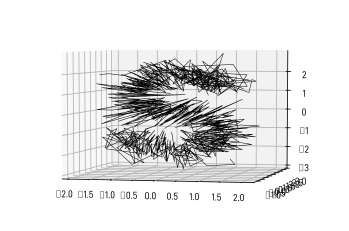

In [37]:
learned_order_soft_03 = [y[0] for y in sorted(enumerate(component_vector_soft_03), key=lambda x: x[1])]
Y= X3[learned_order_soft_03]

ax = plt.axes(projection='3d')
xline = Y[:,0]
yline = Y[:,1]
zline = Y[:,2]
ax.plot3D(xline, yline, zline, c="black")
ax.view_init(4, -77)

# Noise 0.6

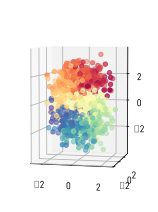

In [38]:
X4, color4 = datasets.make_s_curve(n_points, noise = 0.6, random_state=0)
fig = plt.figure(figsize=(15, 8))

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X4[:, 0], X4[:, 1], X4[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -77)

In [39]:
K_n04 = torch.zeros([1000,1000])
for r1 in range(len(X4)):
    for r2 in range(len(X4)):
        K_n04[r1][r2] = np.exp(-np.linalg.norm(X4[r1] - X4[r2])**2/2)

100%|██████████| 5000/5000 [02:48<00:00, 29.71it/s]


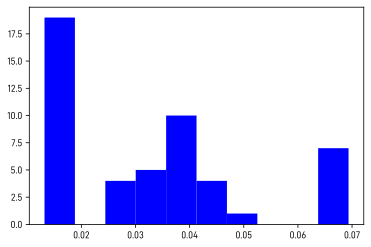

tensor(0.0224)
[tensor(0.0224)]


In [40]:
errors = []
bs=50
for k in range(1,2):
    u0=1/1000*torch.randn([bs, len(K_n04), k], device="cuda") 
    a=torch.randn([bs, k], device="cuda")
    b=torch.randn([bs], device="cuda")
    fac4 = RBFExpansionV2(k=k, batch_size=bs, max_steps=5000)
    fac4.fith(
        K_n04,
        u0=u0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    error = fac4.report.loss_best
    print(torch.min(error))
    errors.append(torch.min(error))
print(errors)

In [41]:
component_vector_soft_04 = fac4.report.x_best[0][torch.argmin(fac4.report.loss_best)].cpu().detach().numpy()
t_04 = color4

/home/symfac/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:90: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
/home/symfac/.local/lib/python3.8/site-packages/matplotlib/textpath.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  glyph = font.load_char(ccode, flags=LOAD_NO_HINTING)


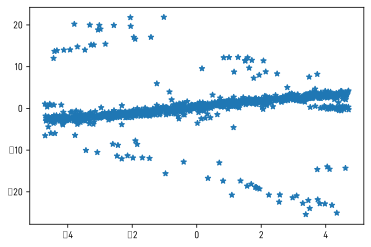

In [42]:
plt.plot(t_04, component_vector_soft_04, '*')

In [43]:
# we pickle 1) 3-d data 2) time component, 3) u vector 
open('manifold_n_04.pickle', 'wb').write(pickle.dumps([t_04, component_vector_soft_04, X4]))

36265

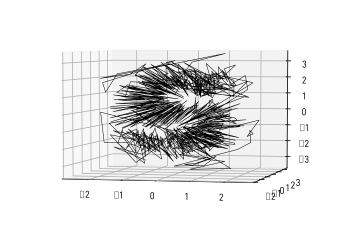

In [44]:
learned_order_soft_04 = [y[0] for y in sorted(enumerate(component_vector_soft_04), key=lambda x: x[1])]
Y= X4[learned_order_soft_04]

ax = plt.axes(projection='3d')
xline = Y[:,0]
yline = Y[:,1]
zline = Y[:,2]
ax.plot3D(xline, yline, zline, c="black")
ax.view_init(4, -77)

# THE END

In [45]:
#open('manifold_00.pickle', 'wb').write(pickle.dumps([t_0, component_vector_soft_0, X]))
#open('manifold_02.pickle', 'wb').write(pickle.dumps([t_02, component_vector_soft_02, X2]))
#open('manifold_04.pickle', 'wb').write(pickle.dumps([t_03, component_vector_soft_03, X3]))
#open('manifold_06.pickle', 'wb').write(pickle.dumps([t_04, component_vector_soft_04, X4]))

36265

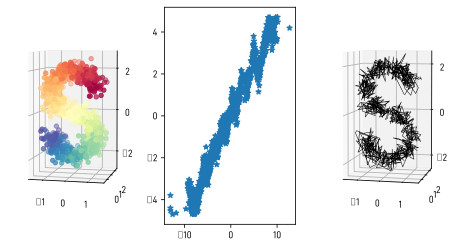

In [56]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -77)

a, color = pickle.load(open("man_nonoise_1.pickle", "rb"))
ax = fig.add_subplot(1, 3, 2)
ax.plot(a2, color2, '*')

ax = fig.add_subplot(1, 3, 3, projection='3d')

xline = X2[order2][:,0]
yline = X2[order2][:,1]
zline = X2[order2][:,2]
ax.plot3D(xline, yline, zline, c="black")
ax.view_init(4, -77)



plt.show()

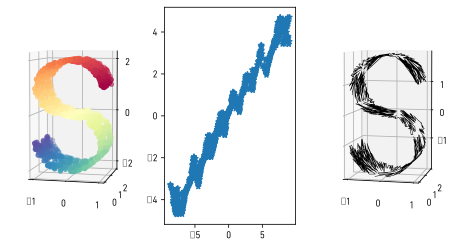

In [82]:
fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 3, 1, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -77)

a, color = pickle.load(open("man_nonoise_1.pickle", "rb"))
ax = fig.add_subplot(1, 3, 2)
ax.plot(a, color, '*')

ax = fig.add_subplot(1, 3, 3, projection='3d')

xline = X[order][:,0]
yline = X[order][:,1]
zline = X[order][:,2]
ax.plot3D(xline, yline, zline, c="black")
ax.view_init(4, -77)



plt.show()

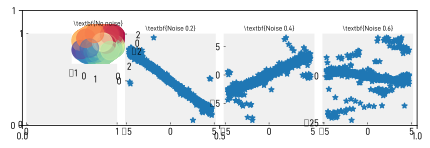

In [69]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__), dpi=300))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.01
dx = 0.25
w = 0.23
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.2,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]


image_style = dict(
    cmap='viridis'
)
axs[0] = fig.add_subplot(251, projection='3d')
axs[0].scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
axs[1].plot(time_02, learned_order_02, '*')
axs[2].plot(time_04, learned_order_04, '*')
axs[3].plot(time_06, learned_order_06, '*')

#axs[3].imshow(svd_reconstruction(4), **image_style)

title_style = dict(
    fontsize=7,
    y=1.02,
    va='top'
)

axs[0].set_title(r'\textbf{No noise}', **title_style)
axs[1].set_title(r'\textbf{Noise 0.2}', **title_style)
axs[2].set_title(r'\textbf{Noise 0.4}', **title_style)
axs[3].set_title(r'\textbf{Noise 0.6}', **title_style)


if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf', dpi=300)
else:
    fig.savefig(f'svg/{__NAME__}.svg', dpi=300)
plt.show()

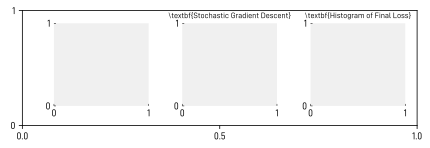

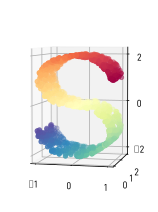

In [68]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__), dpi=300))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.08
y0 = 0.11
dx = 0.325
w = 0.24
h = 0.72
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        top=y0,
        width=w,
        height=h,
        style='modern'
    ) for i in range(3)
]

tick_style = dict(
    fontsize=7
)
label_style = dict(
    fontsize=8,
    labelpad=0.5
    
)

Axes3D

fig = plt.figure(figsize=(15, 8))
axs[0] = fig.add_subplot(251, projection='3d')
axs[0].scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
axs[0].view_init(4, -77)

# GD
def plot_gradient_descent(ax, X):
    ax = fig.add_subplot(251, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
    ax.view_init(4, -77)


plot_gradient_descent(axs[0], data_nn)
plot_gradient_descent(axs[0], data_nn)

plot_gradient_descent(axs[0], data_nn)


title_style = dict(
    fontsize=8,
    y=0.975,
    va='bottom'
)
axs[0].set_title(r'\textbf{Gradient Descent}', **title_style)
axs[1].set_title(r'\textbf{Stochastic Gradient Descent}', **title_style)
axs[2].set_title(r'\textbf{Histogram of Final Loss}', **title_style)

if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}1.pgf', dpi=300)
else:
    fig.savefig(f'svg/{__NAME__}1.svg', dpi=300)
plt.show()

In [49]:
data_nn

array([[ 0.44399868,  1.18576054, -0.10397256],
       [ 0.89724097,  0.02012739, -1.44154121],
       [ 0.8240493 ,  0.95165239, -0.43348191],
       ...,
       [-0.8362143 ,  0.96021561, -1.54840282],
       [-0.55148773,  1.28772807,  1.834183  ],
       [ 0.99513117,  1.00354626, -1.09855936]])

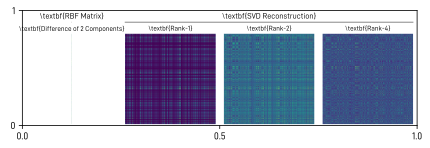

In [9]:
fig = SuperFigure(plt.figure(figsize=(__WIDTH__, __HEIGHT__), dpi=300))
ax_canvas = fig.make_axes(
    left=0, right=1, top=0, bottom=1, zorder=-100,
    style='blank' if __PRODUCTION__ else None
)
ax_canvas.set_xlim([0, 1])
ax_canvas.set_ylim([0, 1])

# draw the axes grid
x0 = 0.01
dx = 0.25
w = 0.23
axs = [
    fig.make_axes(
        left=x0 + dx * i,
        width=w,
        top=0.2,
        width_to_height=1.0,
        style='modern'
    ) for i in range(4)
]

def svd_reconstruction(k):
    U, S, V = np.linalg.svd(K)
    return torch.tensor((U[:, :k] * S[None, :k]) @ V[:k, :])

image_style = dict(
    cmap='viridis'
)
axs[0].imshow(X, **image_style)
axs[1].imshow(svd_reconstruction(1), **image_style)
axs[2].imshow(svd_reconstruction(2), **image_style)
axs[3].imshow(svd_reconstruction(4), **image_style)

title_style = dict(
    fontsize=7,
    y=1.02,
    va='top'
)

axs[0].set_title(r'\textbf{Difference of 2 Components}', **title_style)
axs[1].set_title(r'\textbf{Rank-1}', **title_style)
axs[2].set_title(r'\textbf{Rank-2}', **title_style)
axs[3].set_title(r'\textbf{Rank-4}', **title_style)

for ax in axs:
    ax.patch.set_facecolor('w')
    ax.set_xticks([])
    ax.set_yticks([])

ax_group_rbf = fig.make_axes(
    left=axs[0].left, right=axs[0].right, top=0, bottom=1,
    style='blank', zorder=-10
)
ax_group_svd = fig.make_axes(
    left=axs[1].left, right=axs[3].right, top=0, bottom=1,
    style='blank', zorder=-10
)
for ax_group in [ax_group_rbf, ax_group_svd]:
    ax_group.axhline(
        0.9,
        lw=0.5,
        color='k',
    )
group_text_style = dict(
    fontsize=8,
    ha='center',
    va='bottom',
)
ax_group_rbf.text(0.5, 0.92, r'\textbf{RBF Matrix}', **group_text_style)
ax_group_svd.text(0.5, 0.92, r'\textbf{SVD Reconstruction}', **group_text_style)


if __PRODUCTION__:
    fig.savefig(f'pgf/{__NAME__}.pgf', dpi=300)
else:
    fig.savefig(f'svg/{__NAME__}.svg', dpi=300)
plt.show()

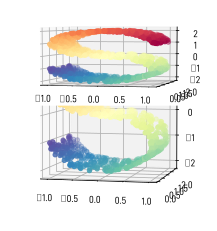

In [8]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -77)

ax = fig.add_subplot(2, 2, 1, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -77)




plt.show()